# Human Resorce Data to Predict Employee Attrition

In this project we are going to develop a model that could predict which employees are more likely to quit. 
This fictional data created by IBM data scientist. We are going to explore the data and then create a model to predict how likely the employee quit the job.

## Load the libraries and the data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

employee_df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

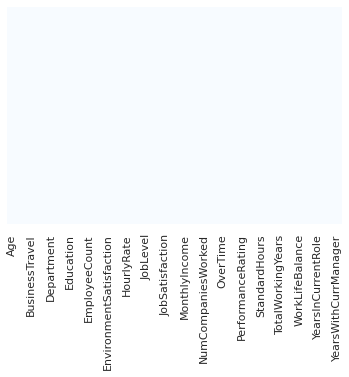

In [5]:
sns.set()
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [6]:
for column in employee_df.select_dtypes(include=['object']):
    print(column)
    print(employee_df[column].unique())
    print('-----------------------------------')

Attrition
['Yes' 'No']
-----------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-----------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
-----------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-----------------------------------
Gender
['Female' 'Male']
-----------------------------------
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-----------------------------------
MaritalStatus
['Single' 'Married' 'Divorced']
-----------------------------------
Over18
['Y']
-----------------------------------
OverTime
['Yes' 'No']
-----------------------------------


* 1470 employee worked at the company over time
* We have categorical and numerical data: we need to investigate the this separately
* Attrition columns indicate "Yes" if the employee quit the job and "No" employee stayed at the company. We should convert this 1 and 0 for using in Machine learning model. 
* Overtime also has Yes and NO. So we need to convert this column to 1 and 0.

* Over18 column has only Y[Yes] meaning every employee over18 so we don't need this information.
* Standard Hour has only unique value 80. So we don't need this column.
* Same including the 'EmployeeCount','EmployeeNumber' column.


In [7]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [8]:
#drop the column, use inplce True for delete the information from the memeory
employee_df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

In [9]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c2dc57690>,
      dtype=object)

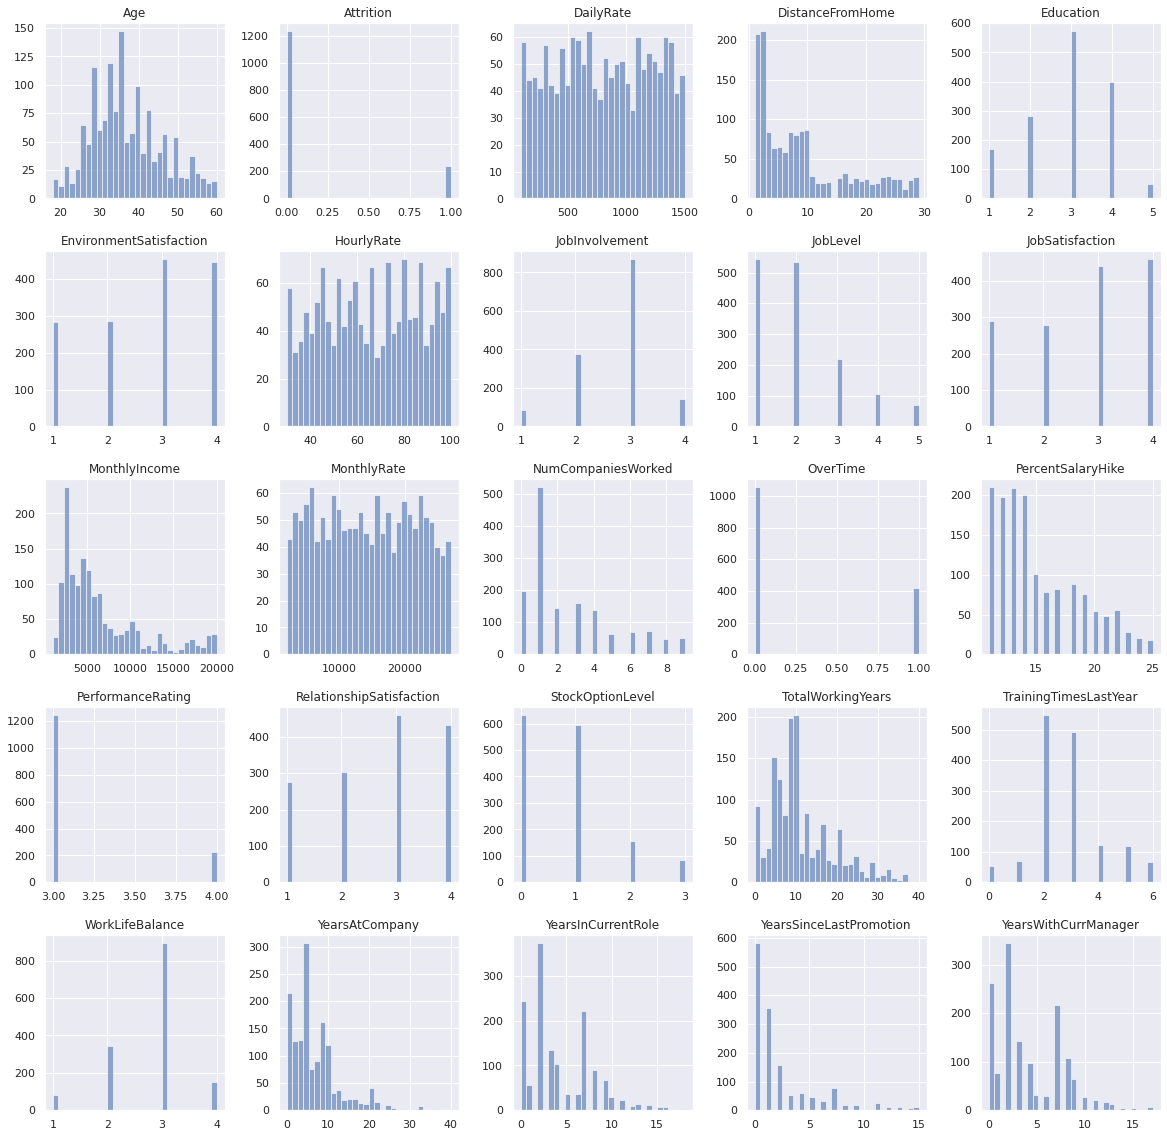

In [10]:
# Visulazing the distibution of the data for every feature
employee_df.hist(bins=30, figsize=(20,20), color='b', alpha=0.6)

In [11]:
attrition = employee_df[employee_df['Attrition'] == 1]
no_attrition = employee_df[employee_df['Attrition']==0]

In [12]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type":"xy"},{"type":"domain"}]],
                    subplot_titles= ("Count of Attrition", "Distribution of Attrition"))

fig.add_trace(go.Bar(x = employee_df['Attrition'].value_counts(),
                     y = ['Employee who stayed', 'Employee who left'],
                     orientation = 'h',
                     opacity=0.8),
                     row=1,col=1)

fig.add_trace(go.Pie(values=employee_df['Attrition'].value_counts(),
                    opacity=0.8),
                    row=1, col=2)
fig.update_layout(height=400, showlegend=False)

fig.show()

In [13]:
def categorical_colum_investigaton(col_name):
    """First Plot: Pie chart for categorical column to see percentage of each value
       Secons Plot: Count plot for categorical column to see the number of count for each of the type
       Third Plot is Number of Count for separeted for Attribition"""

    f,ax = plt.subplots(1,3, figsize=(18,6))
    employee_df[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    employee_df[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    sns.countplot(col_name, hue='Attrition',data=employee_df, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Attrition by {col_name}')
    ax[2].set_xlabel(f'{col_name}')
    ax[2].set_ylabel('Count')


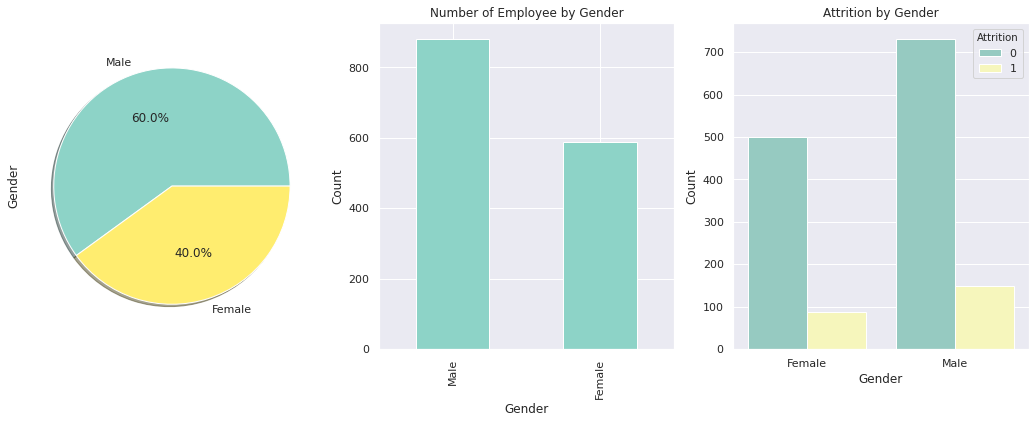

In [14]:
categorical_colum_investigaton('Gender')

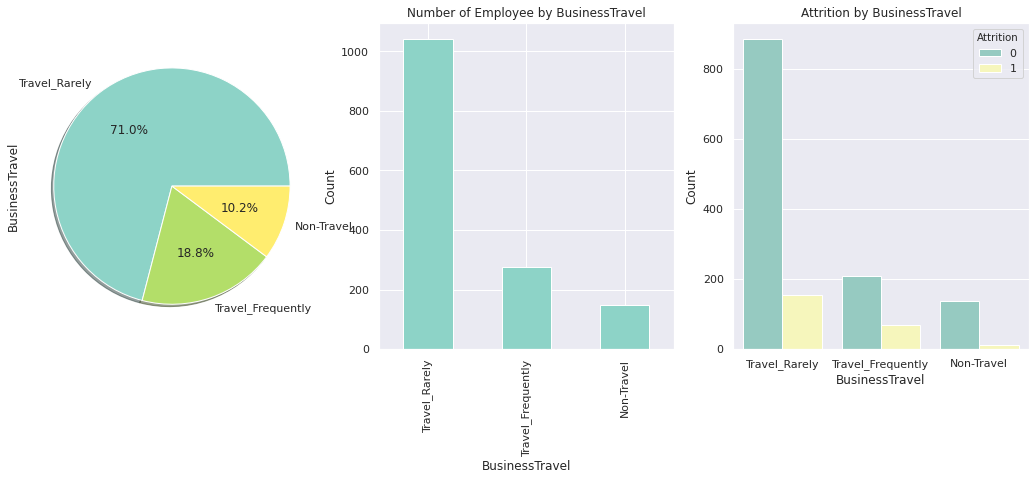

In [15]:
categorical_colum_investigaton('BusinessTravel')

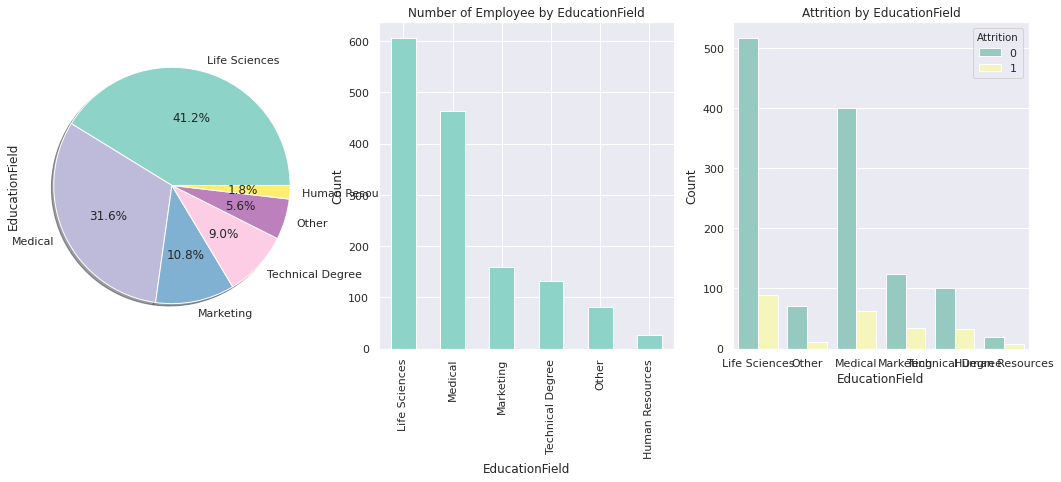

In [16]:
categorical_colum_investigaton('EducationField')

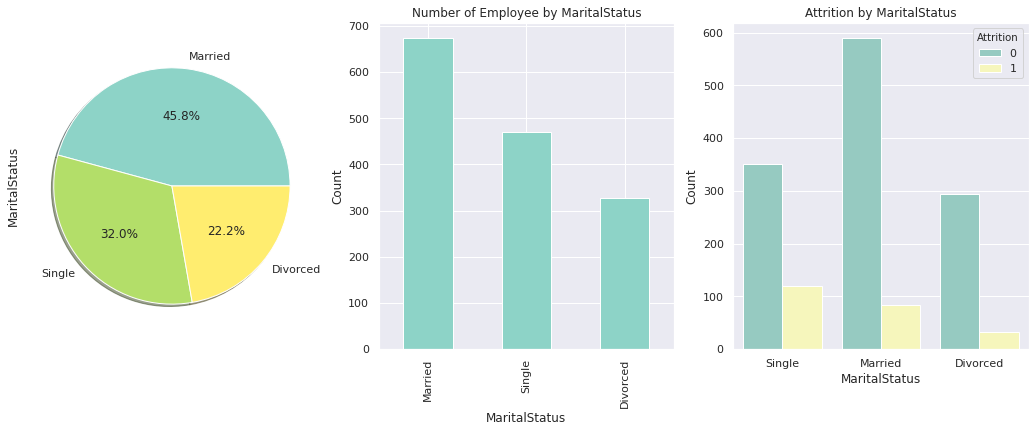

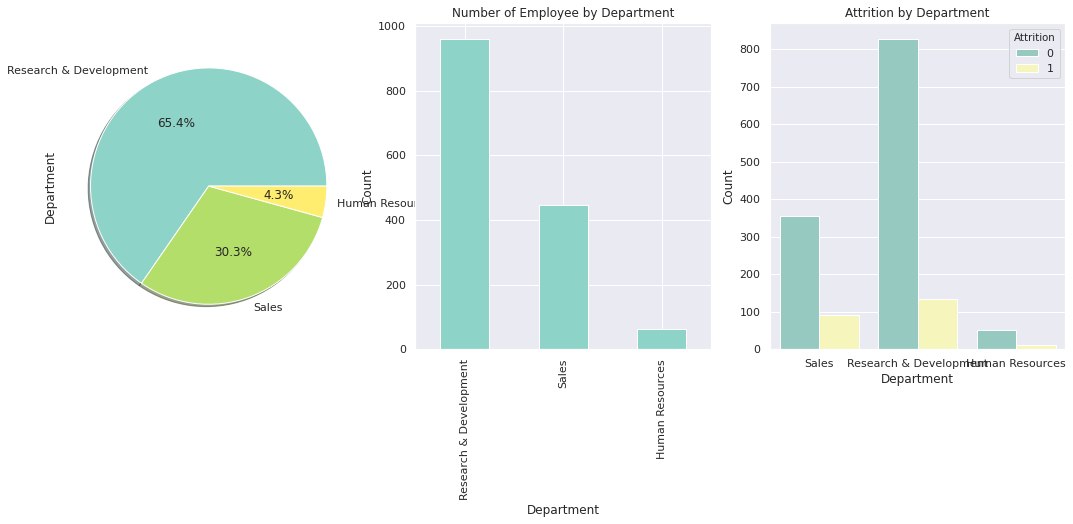

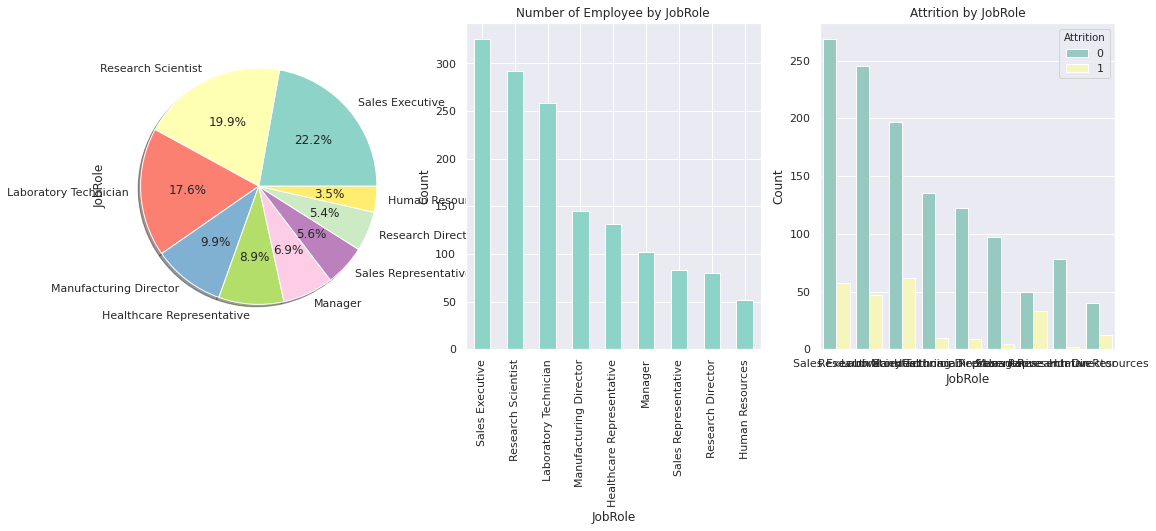

In [17]:
categorical_colum_investigaton('MaritalStatus')
categorical_colum_investigaton('Department')
categorical_colum_investigaton('JobRole')

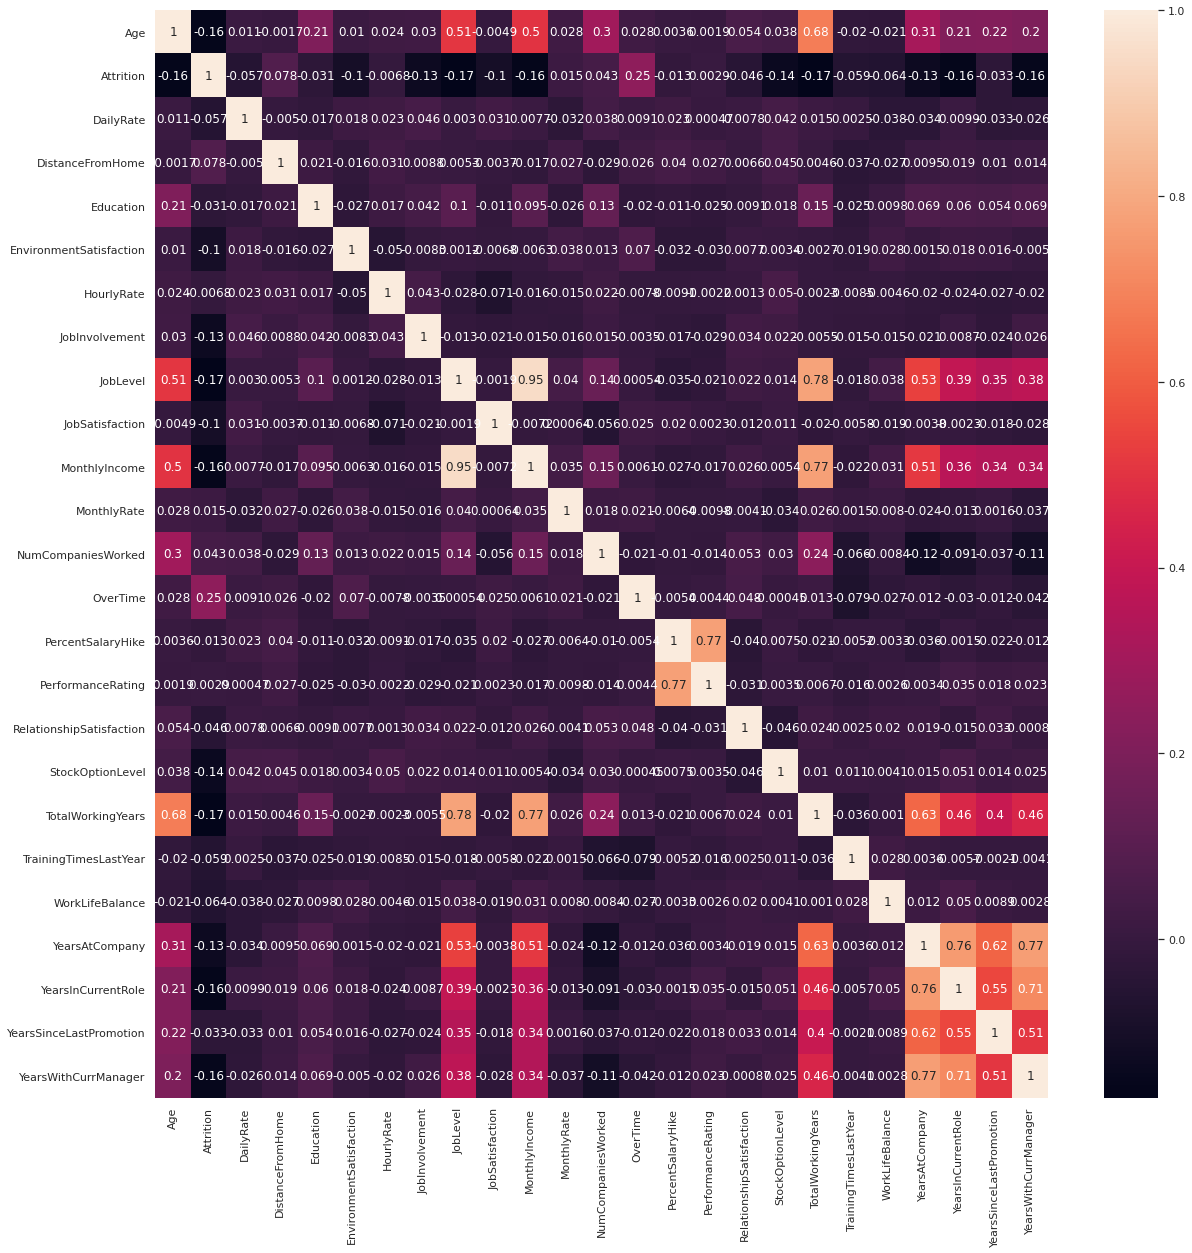

In [18]:
correlations = employee_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


In [19]:
def categorical_numerical_comperation(numerical_col, caterical_col1, caterical_col2):
    

    f,ax = plt.subplots(1,2, figsize=(18,6))
    
    g1= sns.swarmplot( caterical_col1, numerical_col,hue='Attrition', data=employee_df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {caterical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45) 

    
    g2 = sns.swarmplot( caterical_col2, numerical_col,hue='Attrition', data=employee_df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {caterical_col1} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=45) 

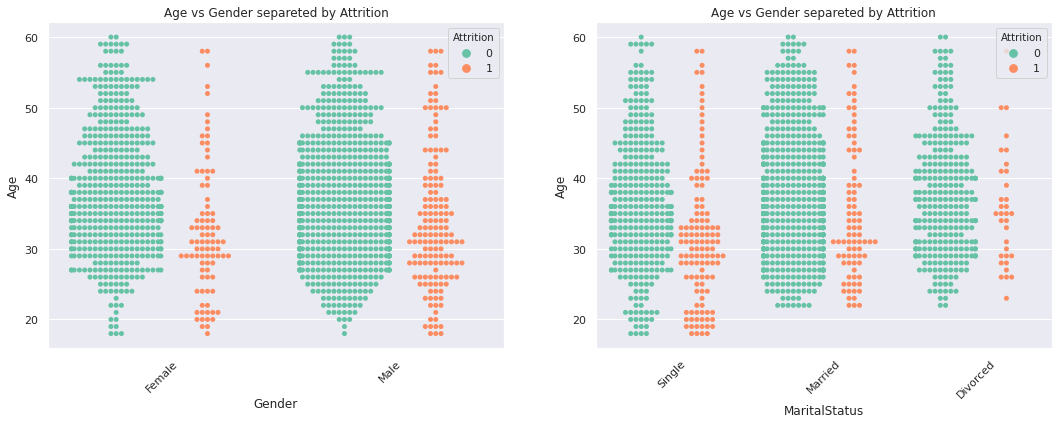

In [20]:
categorical_numerical_comperation('Age','Gender','MaritalStatus')

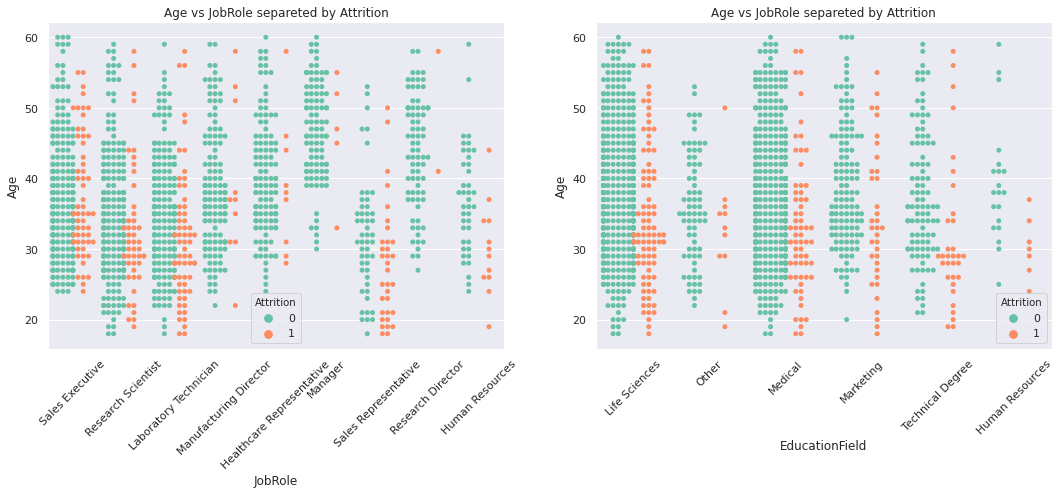

In [21]:
categorical_numerical_comperation('Age','JobRole','EducationField')

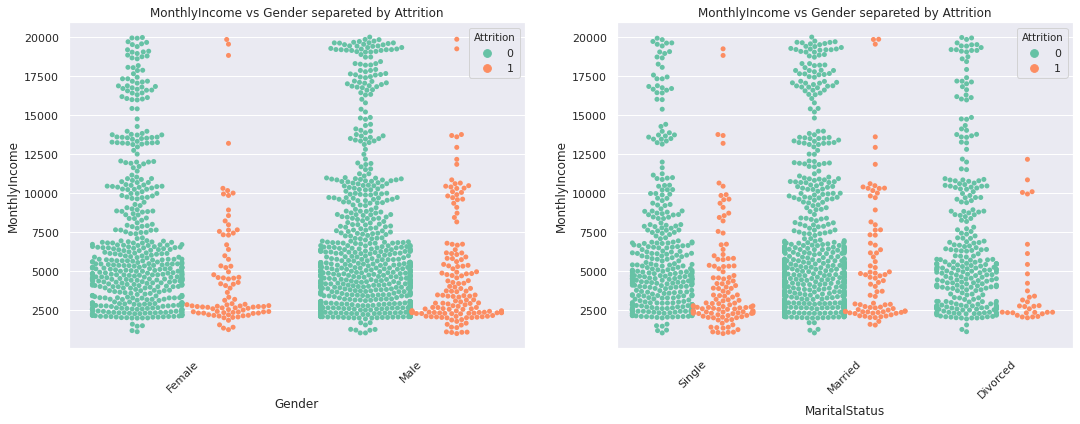

In [22]:
categorical_numerical_comperation('MonthlyIncome','Gender','MaritalStatus')

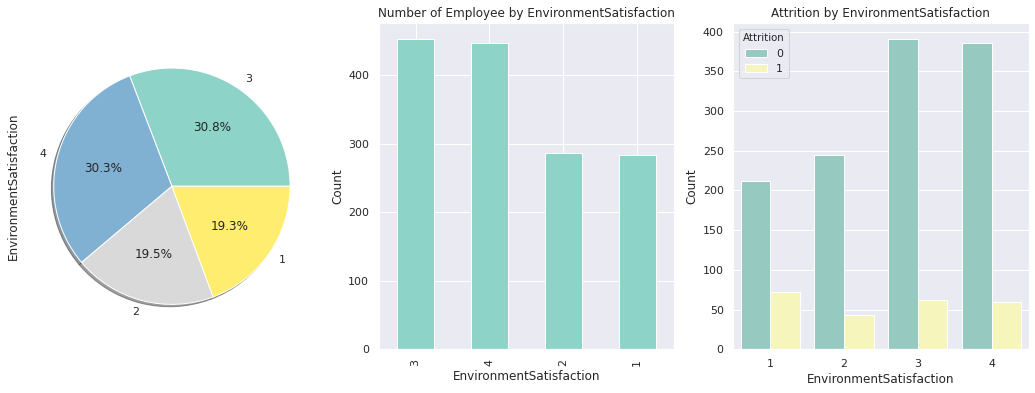

In [23]:
categorical_colum_investigaton('EnvironmentSatisfaction')

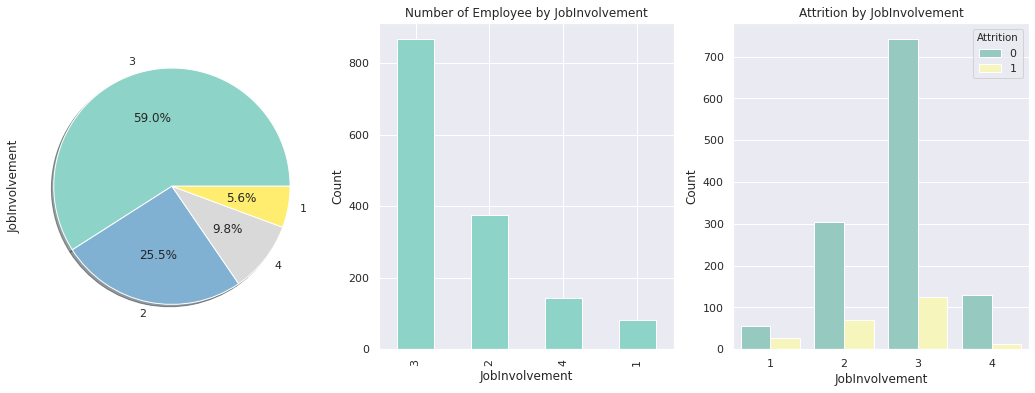

In [24]:
categorical_colum_investigaton('JobInvolvement')

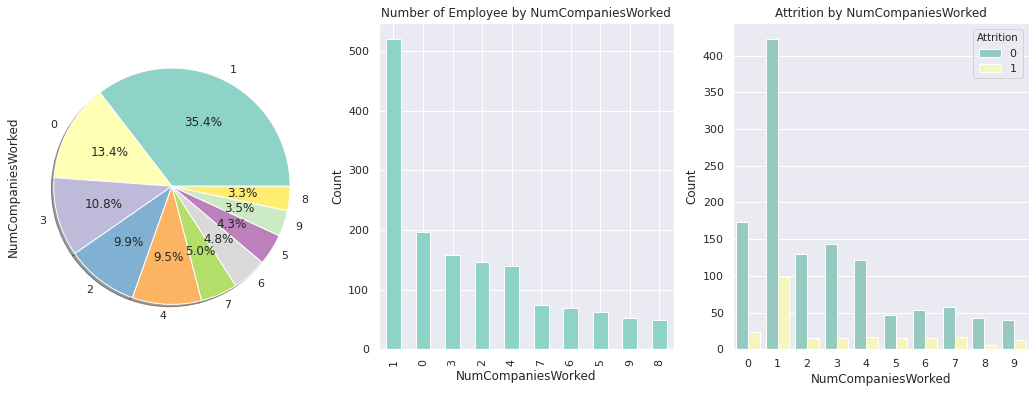

In [25]:
categorical_colum_investigaton('NumCompaniesWorked')

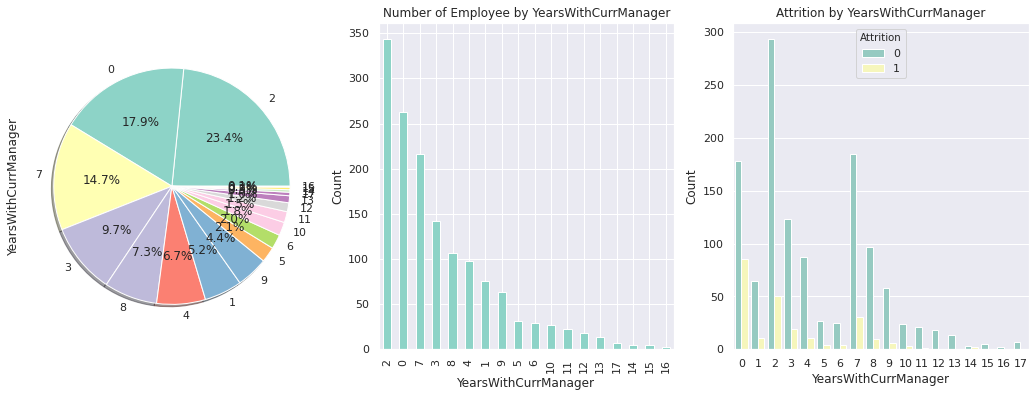

In [26]:
categorical_colum_investigaton('YearsWithCurrManager')

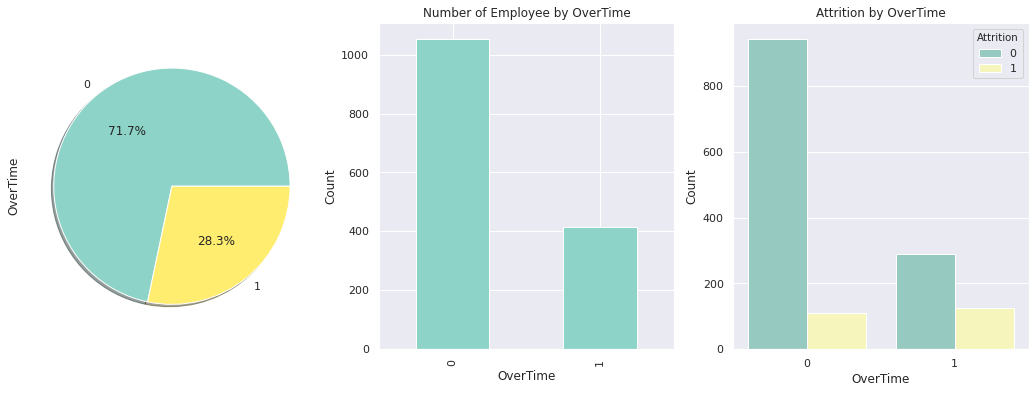

In [27]:
categorical_colum_investigaton('OverTime')

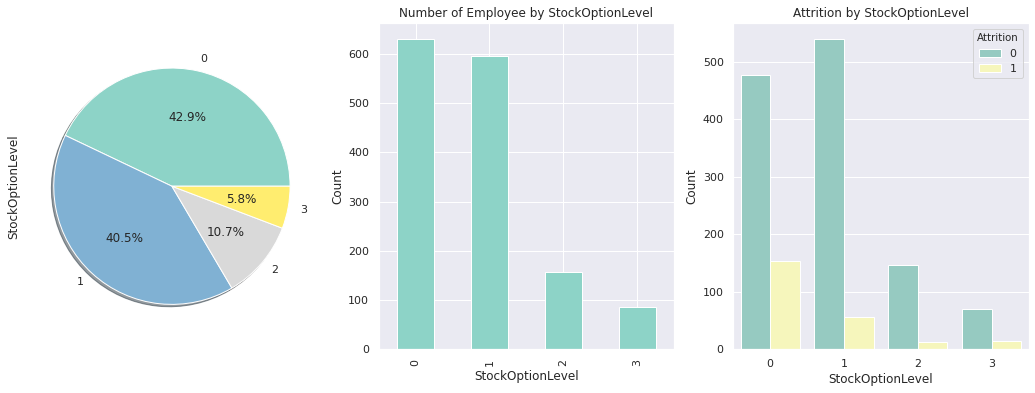

In [28]:
categorical_colum_investigaton('StockOptionLevel')

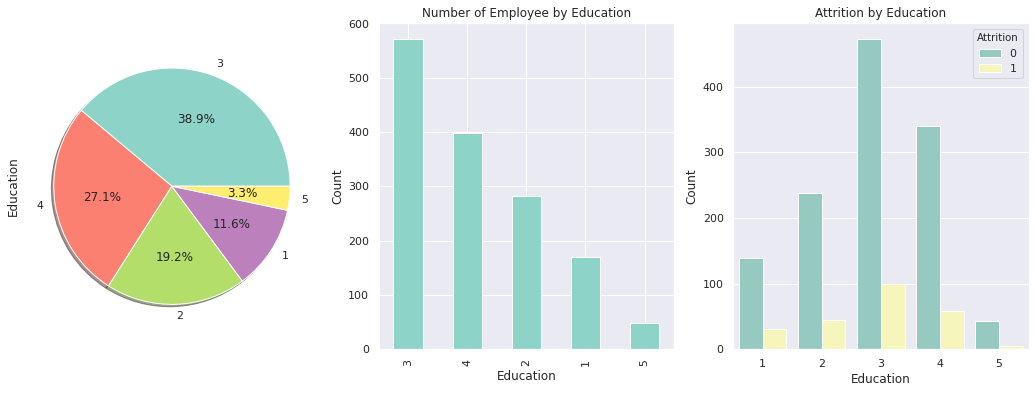

In [29]:
categorical_colum_investigaton('Education')

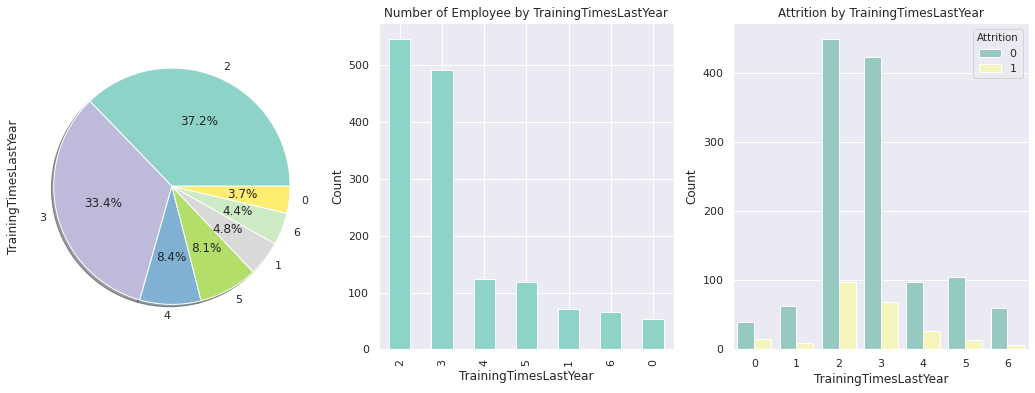

In [30]:
categorical_colum_investigaton('TrainingTimesLastYear')

In [31]:
def numerical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayes', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=employee_df, palette='Set2', ax=ax[1])
    

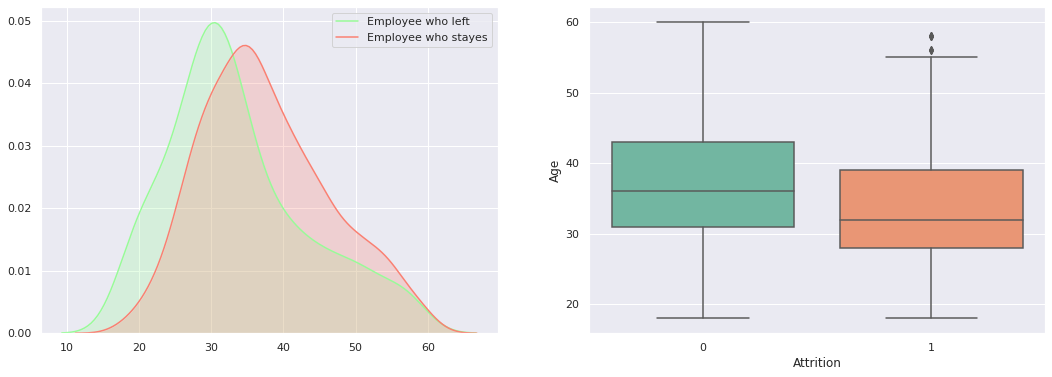

In [32]:
numerical_colum_investigaton("Age")

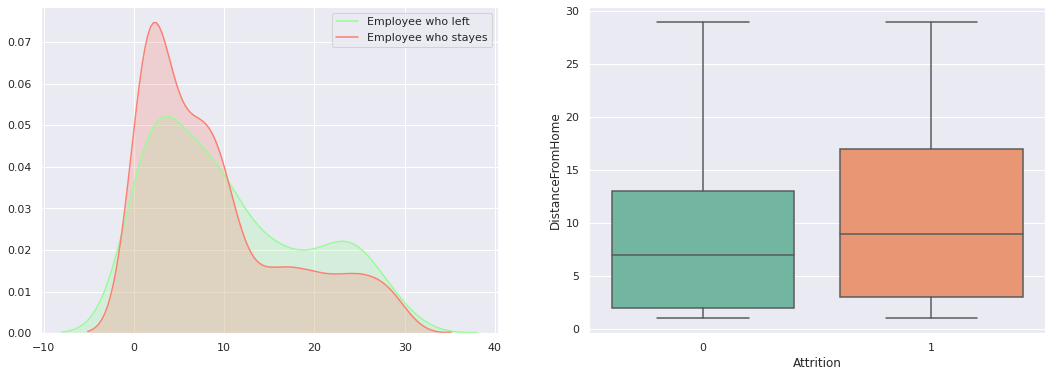

In [33]:
numerical_colum_investigaton('DistanceFromHome')

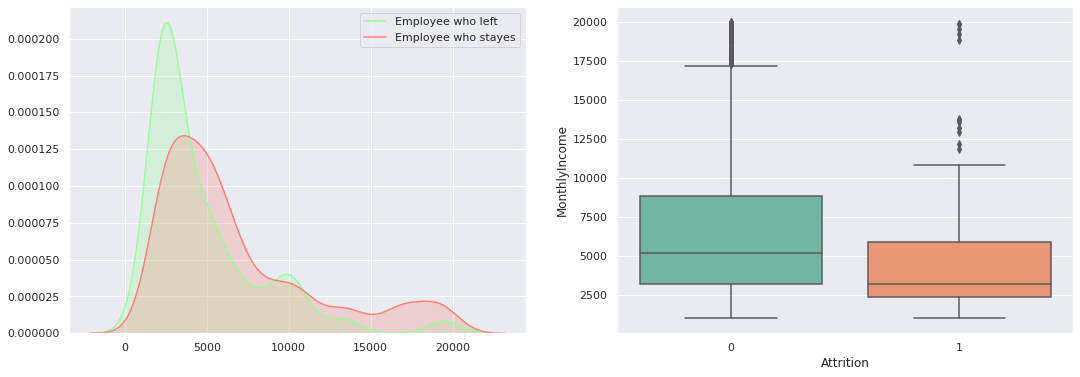

In [34]:
numerical_colum_investigaton('MonthlyIncome')

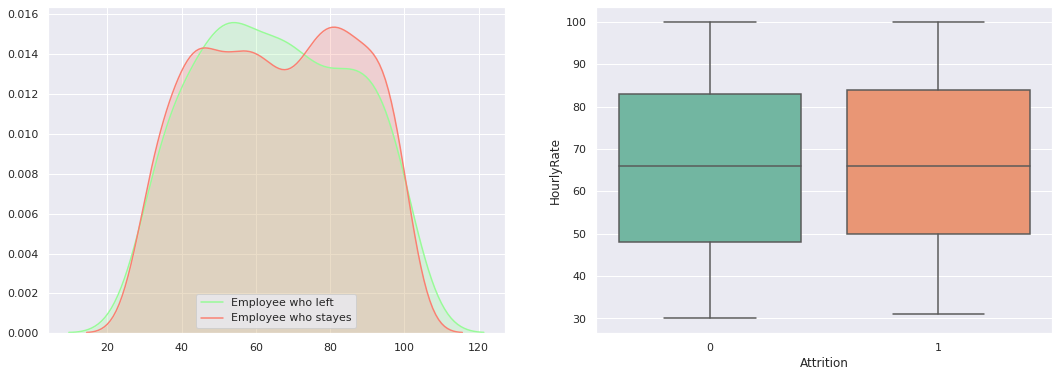

In [35]:
numerical_colum_investigaton('HourlyRate')

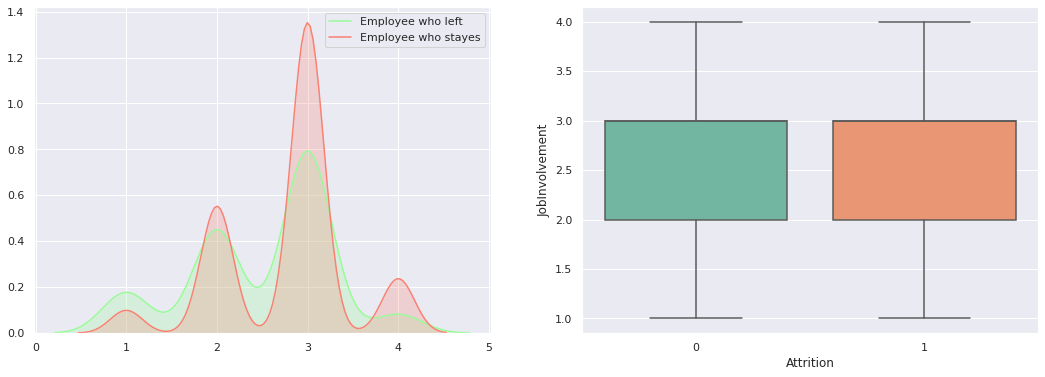

In [36]:
numerical_colum_investigaton('JobInvolvement')

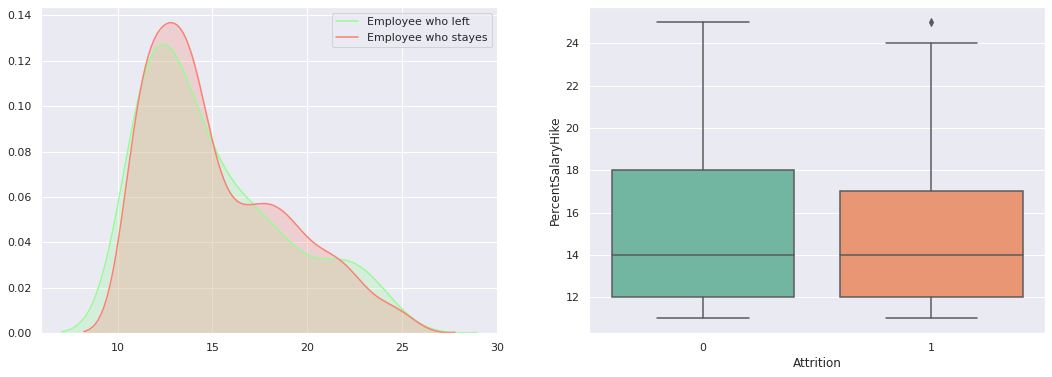

In [37]:
numerical_colum_investigaton('PercentSalaryHike')

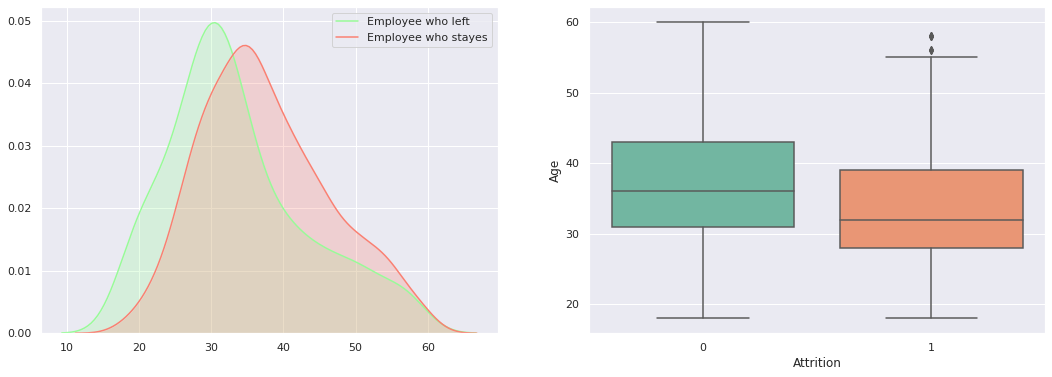

In [38]:
numerical_colum_investigaton('Age')

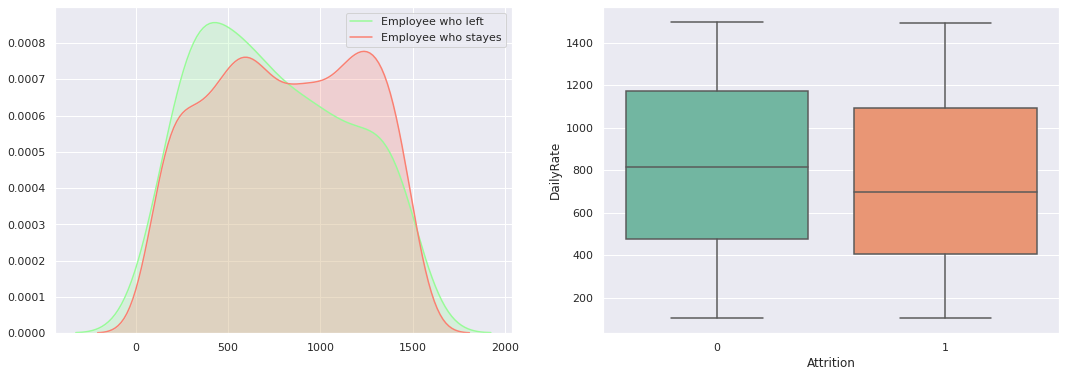

In [39]:
numerical_colum_investigaton('DailyRate')

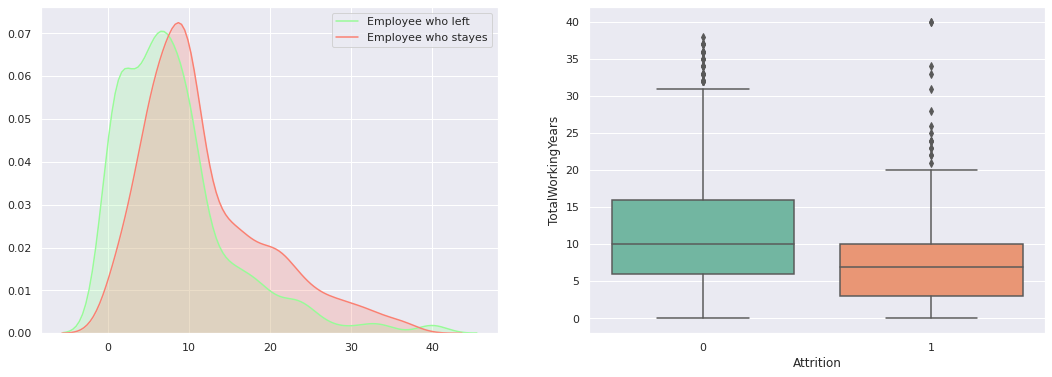

In [40]:
numerical_colum_investigaton('TotalWorkingYears')

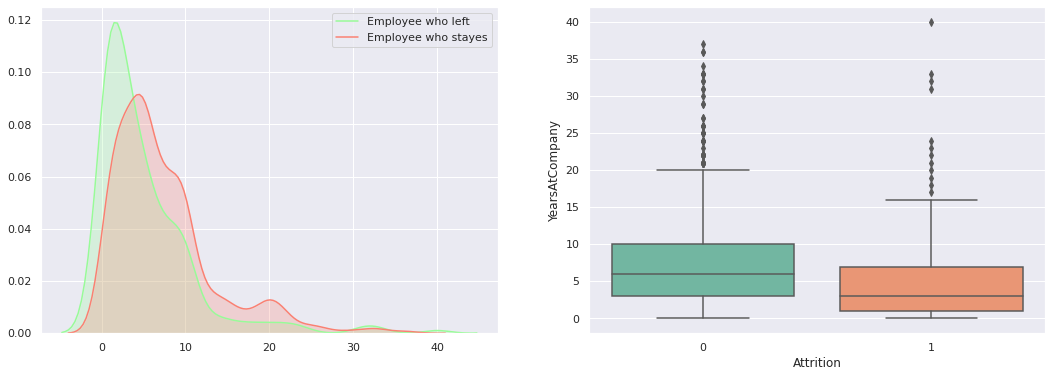

In [41]:
numerical_colum_investigaton('YearsAtCompany')

* Age: Create a new column using qcut for categorixing the Age
* Daily Rate: Morelikely the employee left compant if the dailt rate less than 700. So Create new column if daily  arte less than 700 is 1 else 0
* DistanceFromHome:If the DistanceFromHome more than 10 then employee more likely quit the job.
* Create new column called Total_Satisfaction using  EnvironmentSatisfaction, JobInvolvement,JobSatisfaction, RelationshipSatisfaction,WorkLifeBalance
* 
                                     


## Feature Enginiring



In [42]:
employee_df['Total_Satisfaction'] = (employee_df['EnvironmentSatisfaction'] + 
                                     employee_df['JobInvolvement'] + 
                                     employee_df['JobSatisfaction'] + 
                                     employee_df['RelationshipSatisfaction'] +
                                     employee_df['WorkLifeBalance']) /5 

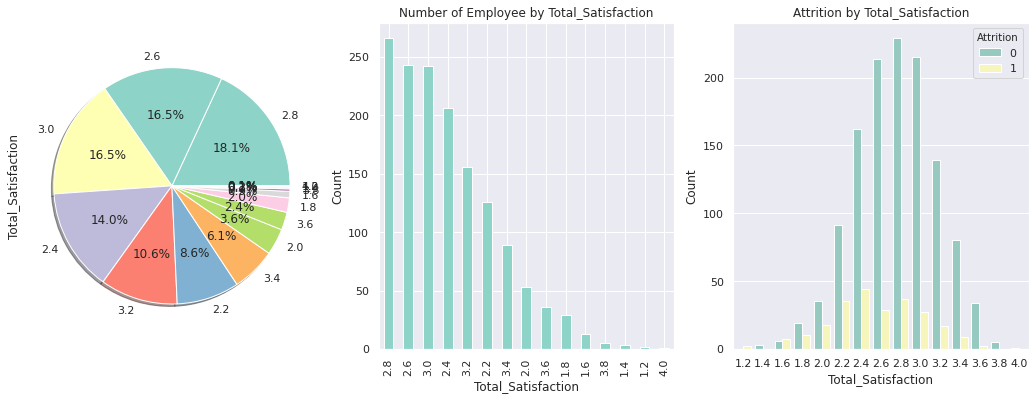

In [43]:
categorical_colum_investigaton('Total_Satisfaction')

In [44]:
# drop used column 
employee_df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)


In [45]:
employee_df['Total_Satisfaction_bool'] = employee_df['Total_Satisfaction'].apply(lambda x:1 if x>=2.2 else 0 ) 
employee_df.drop('Total_Satisfaction', axis=1, inplace=True)

In [46]:
#Age Column more likey the drop the job younger than 35
employee_df['Age_bool'] = employee_df['Age'].apply(lambda x:1 if x<35 else 0)
employee_df.drop('Age', axis=1, inplace=True)

In [47]:
#Daily Rate Column more likey the drop the job if dailtRate less than 750
employee_df['DailyRate_bool'] = employee_df['DailyRate'].apply(lambda x:1 if x<750 else 0)
employee_df.drop('DailyRate', axis=1, inplace=True)

In [48]:
#Departman Column  more likey the drop the job if the employee working at Sales Departmaen
employee_df['Department_bool'] = employee_df['Department'].apply(lambda x:1 if x=='Sales' else 0)
employee_df.drop('Department', axis=1, inplace=True)

In [49]:
# DistanceFromHome Column  more likey the drop the job if the employeeworking far more than 10
employee_df['DistanceFromHome_bool'] = employee_df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
employee_df.drop('DistanceFromHome', axis=1, inplace=True)

In [50]:
# DistanceFromHome Column  more likey the drop the job if the employeeworking hourly rate less than 65
employee_df['HourlyRate_bool'] = employee_df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
employee_df.drop('HourlyRate', axis=1, inplace=True)

In [51]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['JobRole_bool'] = employee_df['JobRole'].apply(lambda x:1 if x=='Sales Executive' else 0)
employee_df.drop('JobRole', axis=1, inplace=True)

In [52]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['MonthlyIncome_bool'] = employee_df['MonthlyIncome'].apply(lambda x:1 if x<3500 else 0)
employee_df.drop('MonthlyIncome', axis=1, inplace=True)

In [53]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['NumCompaniesWorked_bool'] = employee_df['NumCompaniesWorked'].apply(lambda x:1 if x>4 else 0)
employee_df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [54]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['TotalWorkingYears_bool'] = employee_df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
employee_df.drop('TotalWorkingYears', axis=1, inplace=True)

In [55]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['YearsAtCompany_bool'] = employee_df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
employee_df.drop('YearsAtCompany', axis=1, inplace=True)

In [56]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['YearsInCurrentRole_bool'] = employee_df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
employee_df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [57]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['YearsSinceLastPromotion_bool'] = employee_df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
employee_df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [58]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['YearsWithCurrManager_bool'] = employee_df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
employee_df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [59]:
employee_df.drop('MonthlyRate', axis=1, inplace=True)

In [60]:
employee_df.drop('PercentSalaryHike', axis=1, inplace=True)

In [61]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive 
employee_df['Gender'] = employee_df['Gender'].apply(lambda x:1 if x=='Female' else 0)


In [62]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        employee_df[col] = employee_df[col].astype('category')


In [63]:
employee_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Attrition                     1470 non-null   int64   
 1   BusinessTravel                1470 non-null   category
 2   Education                     1470 non-null   category
 3   EducationField                1470 non-null   category
 4   Gender                        1470 non-null   category
 5   JobLevel                      1470 non-null   int64   
 6   MaritalStatus                 1470 non-null   category
 7   OverTime                      1470 non-null   category
 8   PerformanceRating             1470 non-null   int64   
 9   StockOptionLevel              1470 non-null   category
 10  TrainingTimesLastYear         1470 non-null   category
 11  Total_Satisfaction_bool       1470 non-null   int64   
 12  Age_bool                      1470 non-null   in

## CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [64]:
#separate the categorical and numerical column
X_categorical = employee_df.select_dtypes(include=['category'])
X_numerical = employee_df.select_dtypes(include=['int64'])


In [65]:
#create teh target column
y = employee_df['Attrition']

In [66]:
X_numerical.drop('Attrition', axis=1, inplace=True)

In [67]:
#handle the categorical variable
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,HourlyRate_bool,JobRole_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,1,0,0,0,1,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,1,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,1,1,1,0,0


In [69]:
#Scaler the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [71]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1102, 48), Test Data Shape (368, 48)


## A LOGISTIC REGRESSION CLASSIFIER

In [117]:
#import libraires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()

model.fit(X_train, y_train)
model

LogisticRegression()

In [94]:
y_pred = model.predict(X_test)

In [95]:
print(f"Accuracy of Logistic Regression: %{100* accuracy_score(y_pred, y_test)}")

Accuracy of Logistic Regression: %88.31521739130434


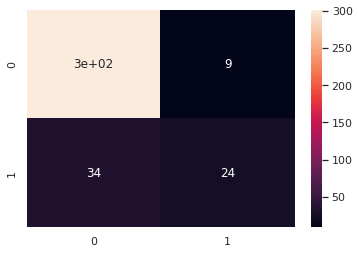

In [96]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       310
           1       0.73      0.41      0.53        58

    accuracy                           0.88       368
   macro avg       0.81      0.69      0.73       368
weighted avg       0.87      0.88      0.87       368



### Calculation Roc Curve and driving

Logistic ROC AUC:0.832
No Skill ROC AUC:0.500


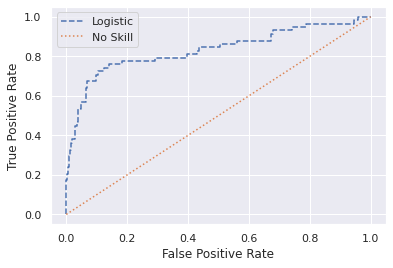

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#predict probabilities
y_probability = model.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability = y_probability[:,1]
## calculate scores
logistic_roc_score = roc_auc_score(y_test, y_probability)
print("Logistic ROC AUC:%.3f" %(logistic_roc_score) )

# generate a no skill prediction (majority class)
noskill_prob = [0 for _ in range(len(y_test))]
noskill_roc_auc = roc_auc_score(y_test,noskill_prob )
print("No Skill ROC AUC:%.3f" %(noskill_roc_auc))

#calculate the roc curve
lo_fpr, lo_tpr, _ =roc_curve(y_test, y_probability)
no_fpr, no_tpr, _ =roc_curve(y_test, noskill_prob)

plt.plot(lo_fpr, lo_tpr, linestyle='dashed', label ='Logistic')
plt.plot(no_fpr, no_tpr, linestyle='dotted', label= 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [100]:
from sklearn.ensemble import RandomForestClassifier

model_Ran = RandomForestClassifier()

model_Ran.fit(X_train, y_train)

y_pred_Ran = model_Ran.predict(X_test)

print(f"Accuracy of Randon Forest Model: {accuracy_score(y_test, y_pred_Ran)}")


Accuracy of Randon Forest Model: 0.8777173913043478


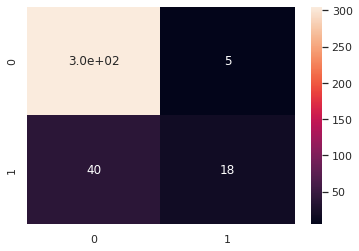

In [101]:
cm_Ran = confusion_matrix(y_test, y_pred_Ran)
sns.heatmap(cm_Ran, annot=True)


In [111]:
print(classification_report(y_test, y_pred_Ran))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       310
           1       0.78      0.31      0.44        58

    accuracy                           0.88       368
   macro avg       0.83      0.65      0.69       368
weighted avg       0.87      0.88      0.85       368



No Skill ROC AUC:0.500
Logistic ROC AUC:0.832
Random Forest ROC AUC:0.763


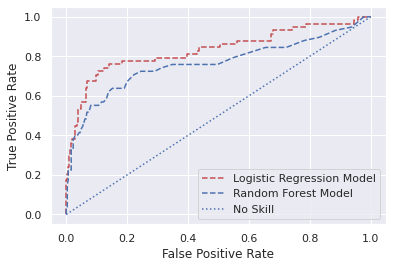

In [113]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
noskill_prob = [0 for _ in range(len(y_test))]
noskill_roc_auc = roc_auc_score(y_test,noskill_prob )
print("No Skill ROC AUC:%.3f" %(noskill_roc_auc))

#predict probabilities
y_probability = model.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability = y_probability[:,1]
## calculate scores
logistic_roc_score = roc_auc_score(y_test, y_probability)
print("Logistic ROC AUC:%.3f" %(logistic_roc_score) )



#Probabilities for random forest
y_probability_Ran = model_Ran.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability_Ran = y_probability_Ran[:,1]
## calculate scores
RandomF_roc_score = roc_auc_score(y_test, y_probability_Ran)
print("Random Forest ROC AUC:%.3f" %(RandomF_roc_score) )


#calculate the roc curve
lo_fpr, lo_tpr, _ =roc_curve(y_test, y_probability)
no_fpr, no_tpr, _ =roc_curve(y_test, noskill_prob)
ra_fpr, ra_tpr, _ =roc_curve(y_test, y_probability_Ran)


plt.plot(lo_fpr, lo_tpr, linestyle='dashed', color= 'r', label ='Logistic Regression Model')
plt.plot(ra_fpr, ra_tpr, linestyle='dashed', color= 'b', label= 'Random Forest Model')
plt.plot(no_fpr, no_tpr, linestyle='dotted', label= 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## TRYING MULTIPLE MODEL WITH CROSS VALIDATION

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV




kfold = KFold(n_splits=10, random_state=22,shuffle=True)
xyz= []
accuracy = []
std = []
y_pred_list = []


classifiers = ['Linear Svm',
              'Radical Svm',
              'Logistic Regression',
              'KNN',
              'Decision Tree',
              'Naive Bayes',
              'Random Forest',
              'XGBoost']

models = [svm.SVC(kernel='linear'),
         svm.SVC(kernel='rbf'),
         LogisticRegression(solver='liblinear'),
         KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier()
        ]

for i in models:
    model = i 
    cv_result =cross_val_score(model, 
                               X_train, 
                               y_train, 
                               cv=kfold,
                              scoring='accuracy')
    y_pred = cross_val_predict(model, X, y, cv=10)
    y_pred_list.append(y_pred)
    cv_result =cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
    
    
    
new_model_data_frame =pd.DataFrame({'Cv Mean': xyz,
                                   'Std': std},
                                   index=classifiers)

new_model_data_frame

,Cv Mean,Std
Linear Svm,0.860205,0.029548
Radical Svm,0.856560,0.033182
Logistic Regression,0.863825,0.030612
KNN,0.832957,0.030239
Decision Tree,0.761368,0.030174
Naive Bayes,0.775839,0.033915
Random Forest,0.852015,0.028451
XGBoost,0.831204,0.027090


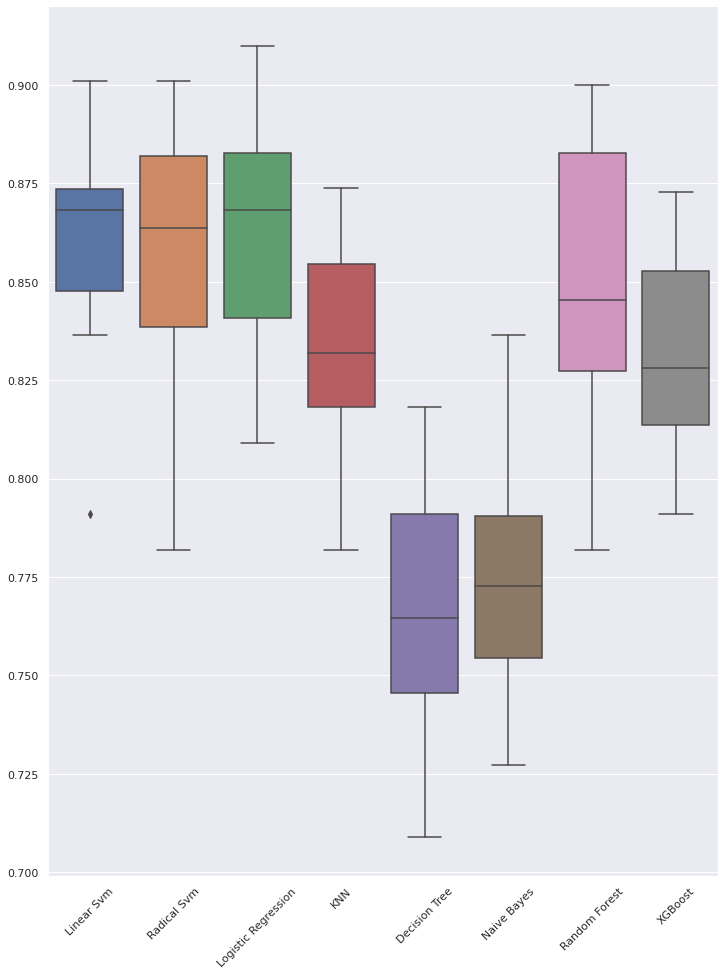

In [181]:
plt.subplots(figsize=(12,16))
plt.xticks(rotation=45)
sns.boxplot(new_model_data_frame.index, accuracy)

In [214]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)


gd.fit(X_train,y_train)


print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8666063348416291
SVC(C=0.4, gamma=0.1, kernel='linear')


[Parallel(n_jobs=1)]: Done 1300 out of 1300 | elapsed:  1.3min finished
